In [179]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [180]:
df = pd.read_csv('data_cleaned.csv')

In [181]:
df.head()

,Job Title,Job Description,Rating,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,company,age,python_yn,R_yn,spark,aws,gcp,azure,sql,excel
0,Data Engineer & Developer,"Descripción de la empresa\n\nSGS del Perú, com...",3.3,Peru,10000+ Employees,1878,Company - Public,Consulting,Business Services,$5 to $10 billion (USD),SGS,142,0,0,0,0,0,0,0,0
1,Data Engineer,Somos la consultora de tecnología que habilita...,3.4,Peru,51 to 200 Employees,-1,Contract,-1,-1,Less than $1 million (USD),Xertica,-1,0,0,0,1,1,1,0,0
2,Data Engineer - GCP,En TiSmart estamos enteramente comprometidos c...,3.6,Peru,51 to 200 Employees,-1,Company - Private,-1,-1,Less than $1 million (USD),Tismart,-1,0,0,0,0,1,0,0,0
3,ETL Developer,Main Description --We are looking for an ETL D...,4.2,Peru,1 to 50 Employees,-1,Company - Private,-1,-1,Less than $1 million (USD),Tismart,-1,0,0,0,0,0,0,0,0
4,Backend Engineer - Latin America,Azumo is looking for a highly motivated Backen...,4.1,Peru,1 to 50 Employees,2016,Company - Private,IT Services,Information Technology,Unknown / Non-Applicable,Azumo,4,1,0,0,0,0,0,0,1


In [182]:
df.count()

Job Title            436
Job Description      436
Rating               436
Location             436
Size                 436
Founded              436
Type of ownership    436
Industry             436
Sector               436
Revenue              436
company              435
age                  436
python_yn            436
R_yn                 436
spark                436
aws                  436
gcp                  436
azure                436
sql                  436
excel                436
dtype: int64

In [183]:
df.columns

Index(['Job Title', 'Job Description', 'Rating', 'Location', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'company', 'age',
       'python_yn', 'R_yn', 'spark', 'aws', 'gcp', 'azure', 'sql', 'excel'],
      dtype='object')

In [184]:
def title_simplifier(title):
    if 'data scientist' in title.lower() or 'data science' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower() or 'database engineer' in title.lower() or 'data developer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower() or 'analytics' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower() or 'ml' in title.lower() or 'ia' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'qa' in title.lower():
        return 'QA engineer'
    elif 'director' in title.lower():
        return 'director'
    elif 'software engineer' in title.lower() or 'software developer' in title.lower() or 'backend' in title.lower() or 'frontend' in title.lower() or 'back-end' in title.lower() or 'front-end' in title.lower() or 'fullstack' in title.lower() or 'full-stack' in title.lower() or 'full stack' in title.lower() or 'principal engineer' in title.lower():
        return 'software engineer'
    elif 'devops' in title.lower() or 'pipeline engineer' in title.lower() or 'systems engineer' in title.lower():
        return 'DevOps Engineer'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'mid' in title.lower() or 'middle' in title.lower():
        return 'middle'
    elif 'jr' in title.lower() or 'jr.' in title.lower() or 'junior' in title.lower():
        return 'jr'
    else:
        return 'na'
		



In [185]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [186]:
df.job_simp.value_counts()

data engineer        173
software engineer     99
na                    71
analyst               24
data scientist        23
mle                   23
QA engineer           13
DevOps Engineer       10
Name: job_simp, dtype: int64

In [187]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        292
senior    130
jr          9
middle      5
Name: seniority, dtype: int64

In [188]:
df.company

0                                       SGS
1                                   Xertica
2                                   Tismart
3                                   Tismart
4                                     Azumo
5                          APPLAUDO STUDIOS
6                                       IBM
7                            FullStack Labs
8                                      VTEX
9                                     Azumo
10                           FullStack Labs
11                         Wolfram Research
12                         Hitachi Rail STS
13                                    Rappi
14                                      SGS
15                                   Encora
16                                   Encora
17                                    Jayco
18                              ATHENAWORKS
19                                     Able
20                                     Able
21                                     Able
22                              

In [189]:
df.describe()

,Rating,Founded,age,python_yn,R_yn,spark,aws,gcp,azure,sql,excel
count,436.000000,436.000000,436.000000,436.000000,436.0,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000
mean,3.592202,1512.853211,24.834862,0.300459,0.0,0.204128,0.339450,0.080275,0.135321,0.344037,0.213303
std,1.568639,848.959830,37.335451,0.458984,0.0,0.403526,0.474066,0.272031,0.342459,0.475599,0.410110
min,-1.000000,-1.000000,-1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.600000,1865.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.100000,1989.000000,12.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.400000,2009.000000,33.250000,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,5.000000,2020.000000,208.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [190]:
df.columns

Index(['Job Title', 'Job Description', 'Rating', 'Location', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'company', 'age',
       'python_yn', 'R_yn', 'spark', 'aws', 'gcp', 'azure', 'sql', 'excel',
       'job_simp', 'seniority'],
      dtype='object')

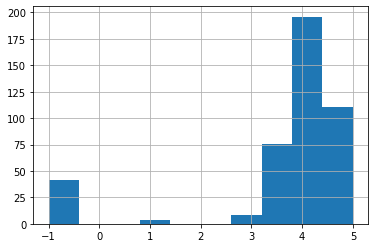

In [191]:
df.Rating.hist()

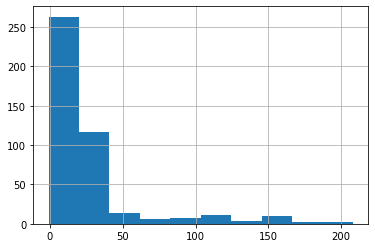

In [192]:
df.age.hist()

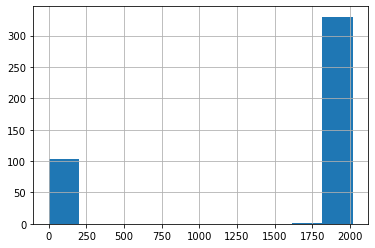

In [193]:
df.Founded.hist()

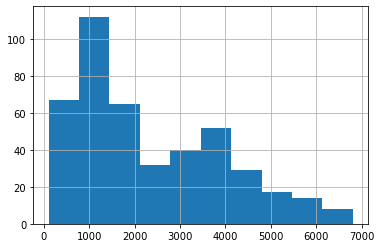

In [194]:
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df.desc_len.hist()

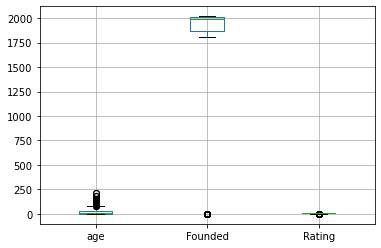

In [195]:
df.boxplot(column = ['age','Founded','Rating'])

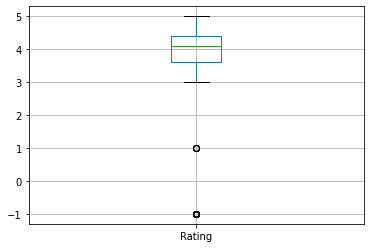

In [196]:
df.boxplot(column = 'Rating')

In [197]:
df[['age','Founded','Rating','desc_len']].corr()

,age,Founded,Rating,desc_len
age,1.000000,0.350046,0.185591,0.046953
Founded,0.350046,1.000000,0.586922,0.139468
Rating,0.185591,0.586922,1.000000,0.054328
desc_len,0.046953,0.139468,0.054328,1.000000


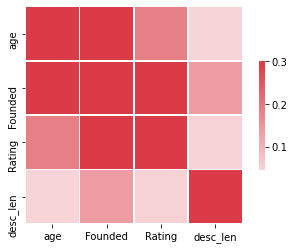

In [198]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','Founded','Rating','desc_len']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [199]:
df.columns

Index(['Job Title', 'Job Description', 'Rating', 'Location', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'company', 'age',
       'python_yn', 'R_yn', 'spark', 'aws', 'gcp', 'azure', 'sql', 'excel',
       'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [200]:
df_cat = df[['Location', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company', 'python_yn', 'R_yn',
       'spark', 'aws', 'gcp', 'azure', 'sql', 'excel', 'job_simp', 'seniority']]

graph for Location: total = 5


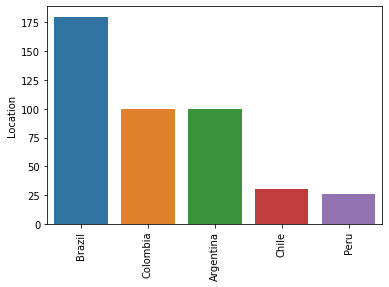

graph for Size: total = 9


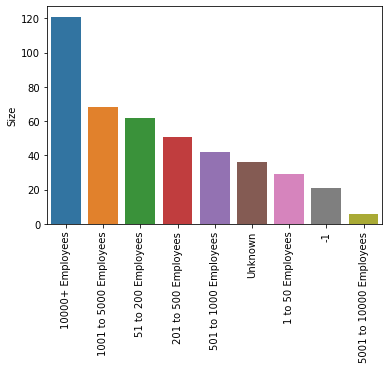

graph for Type of ownership: total = 8


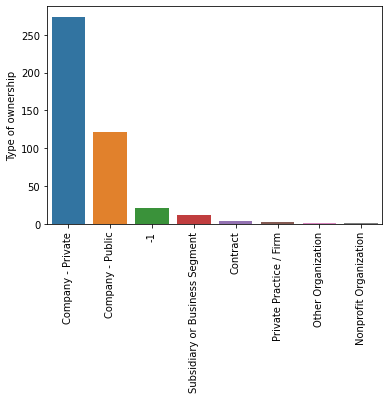

graph for Industry: total = 37


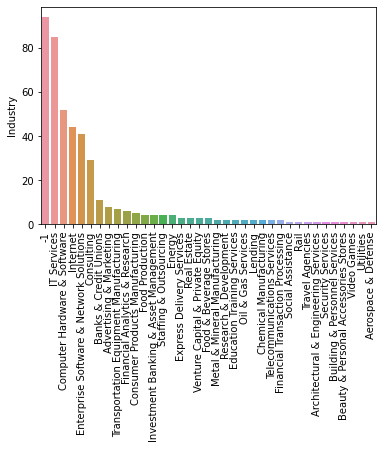

graph for Sector: total = 16


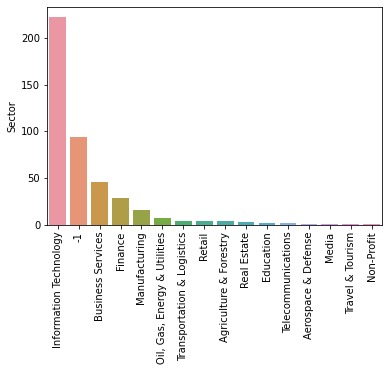

graph for Revenue: total = 14


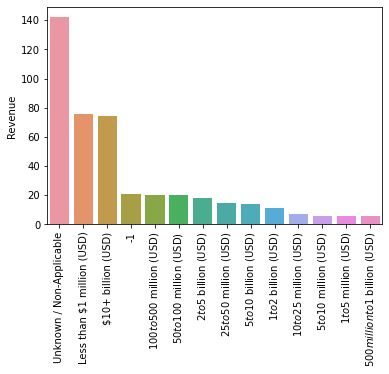

graph for company: total = 216


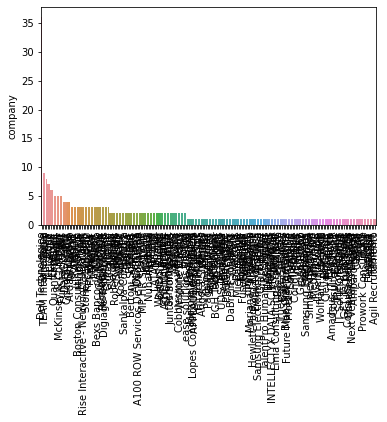

graph for python_yn: total = 2


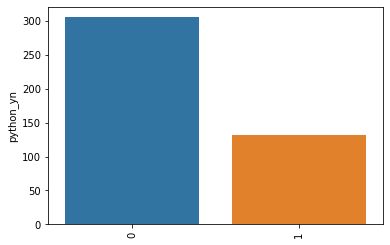

graph for R_yn: total = 1


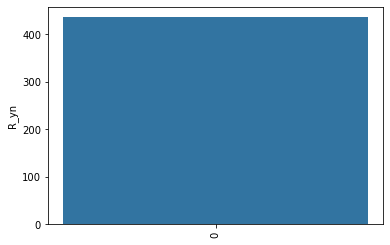

graph for spark: total = 2


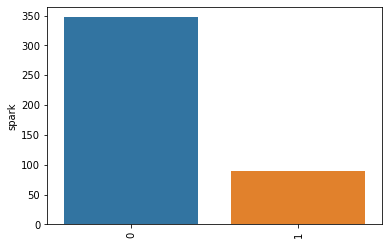

graph for aws: total = 2


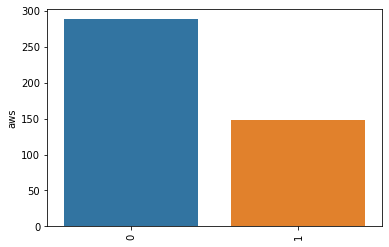

graph for gcp: total = 2


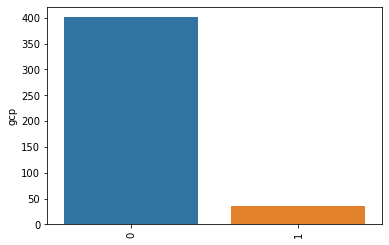

graph for azure: total = 2


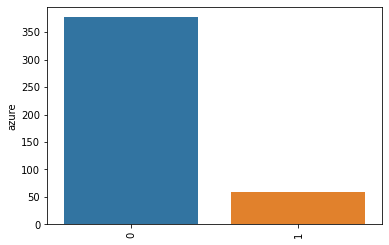

graph for sql: total = 2


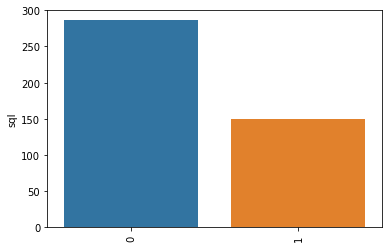

graph for excel: total = 2


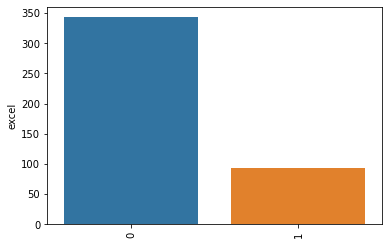

graph for job_simp: total = 8


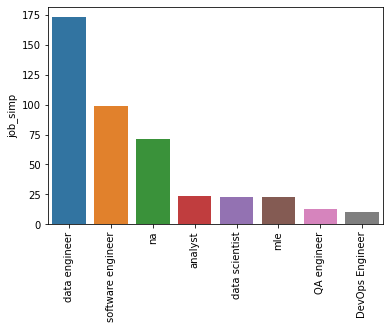

graph for seniority: total = 4


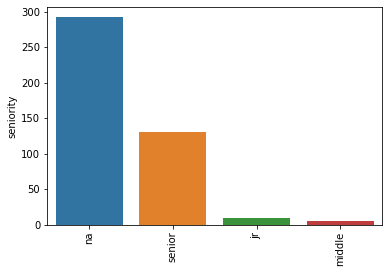

In [201]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 5


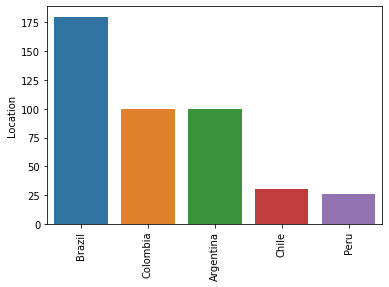

graph for company: total = 20


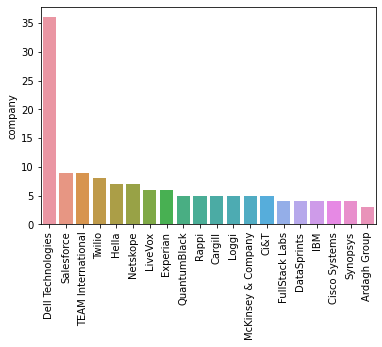

In [202]:
for i in df_cat[['Location','company']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [203]:
df.columns

Index(['Job Title', 'Job Description', 'Rating', 'Location', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'company', 'age',
       'python_yn', 'R_yn', 'spark', 'aws', 'gcp', 'azure', 'sql', 'excel',
       'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [204]:
pd.pivot_table(df, index = 'job_simp', values = 'Rating')

,Rating
job_simp,
DevOps Engineer,4.160000
QA engineer,3.700000
analyst,3.891667
data engineer,3.161272
data scientist,3.800000
mle,3.447826
na,3.732394
software engineer,4.085859


In [205]:
pd.pivot_table(df, index = ['job_simp','seniority'], values = 'Rating')

Rating
job_simp          seniority          
DevOps Engineer   na         4.233333
                  senior     4.050000
QA engineer       middle     4.400000
                  na         3.928571
                  senior     3.240000
analyst           na         3.816667
                  senior     4.116667
data engineer     jr         4.000000
                  middle     4.550000
                  na         3.097581
                  senior     3.237778
data scientist    na         3.700000
                  senior     3.955556
mle               na         3.365000
                  senior     4.000000
na                jr         4.160000
                  middle     4.400000
                  na         3.726923
                  senior     3.538462
software engineer jr         4.350000
                  middle     3.900000
                  na         4.217647
                  senior     3.928889

In [206]:
pd.pivot_table(df, index = ['Location','job_simp'], values = 'Rating').sort_values('Location', ascending = False)

Rating
Location  job_simp                   
Peru      software engineer  3.540000
          na                 3.000000
          mle                3.600000
          data engineer      3.433333
          analyst            3.300000
          QA engineer        4.200000
          DevOps Engineer    4.400000
Colombia  data engineer      3.605556
          DevOps Engineer    4.180000
          QA engineer        4.150000
          analyst            4.233333
          software engineer  3.823810
          data scientist     3.925000
          mle                4.200000
          na                 4.096429
Chile     na                 4.083333
          software engineer  3.900000
          mle                4.275000
          data engineer      3.822222
          data scientist     2.650000
Brazil    analyst            3.530000
          software engineer  4.267391
          na                 3.335714
          mle                3.200000
          data scientist     4.025000
          data engineer      3.440964
          QA engineer        2.650000
          DevOps Engineer    3.966667
Argentina mle                2.950000
          data engineer      2.528333
          data scientist     4.400000
          analyst            4.000000
          na                 3.673333
          software engineer  4.346667
          QA engineer        4.200000

In [207]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [208]:
pd.pivot_table(df, index = ['Location','job_simp'], values = 'Rating', aggfunc = 'count').sort_values('Location', ascending = False)

Rating
Location  job_simp                 
Peru      software engineer      10
          na                      8
          mle                     1
          data engineer           3
          analyst                 1
          QA engineer             1
          DevOps Engineer         2
Colombia  data engineer          18
          DevOps Engineer         5
          QA engineer             6
          analyst                12
          software engineer      21
          data scientist          8
          mle                     2
          na                     28
Chile     na                      6
          software engineer       7
          mle                     4
          data engineer           9
          data scientist          4
Brazil    analyst                10
          software engineer      46
          na                     14
          mle                    12
          data scientist          8
          data engineer          83
          QA engineer             4
          DevOps Engineer         3
Argentina mle                     4
          data engineer          60
          data scientist          3
          analyst                 1
          na                     15
          software engineer      15
          QA engineer             2

In [209]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'Location', values = 'Rating').sort_values('Rating', ascending = False)

,Rating
Location,
Argentina,4.400
Brazil,4.025
Colombia,3.925
Chile,2.650


In [210]:
df.job_simp.value_counts()

data engineer        173
software engineer     99
na                    71
analyst               24
data scientist        23
mle                   23
QA engineer           13
DevOps Engineer       10
Name: job_simp, dtype: int64

In [211]:
pd.pivot_table(df[df.job_simp == 'data engineer'], index = 'Location', values = 'Rating').sort_values('Rating', ascending = False)

,Rating
Location,
Chile,3.822222
Colombia,3.605556
Brazil,3.440964
Peru,3.433333
Argentina,2.528333


In [212]:
df.columns

Index(['Job Title', 'Job Description', 'Rating', 'Location', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'company', 'age',
       'python_yn', 'R_yn', 'spark', 'aws', 'gcp', 'azure', 'sql', 'excel',
       'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [213]:
#Industry vs Rating
df_pivots = df[[ 'Industry', 'Sector', 'Revenue', 'python_yn', 'R_yn', 'spark', 'aws', 'gcp', 'azure', 'sql', 'excel', 'Type of ownership','seniority', 'Rating']]

In [214]:
for i in df_pivots.columns:
    print(i)
    if(i != 'Rating'):
        print(pd.pivot_table(df_pivots,index =i, values = 'Rating').sort_values('Rating', ascending = False))

Industry
                                           Rating
Industry                                         
Express Delivery Services                4.600000
Social Assistance                        4.600000
Utilities                                4.500000
Banks & Credit Unions                    4.427273
IT Services                              4.258824
Research & Development                   4.250000
Food & Beverage Stores                   4.200000
Education Training Services              4.200000
Financial Transaction Processing         4.200000
Internet                                 4.138636
Staffing & Outsourcing                   4.125000
Enterprise Software & Network Solutions  4.121951
Financial Analytics & Research           4.100000
Telecommunications Services              4.100000
Computer Hardware & Software             4.044231
Lending                                  4.000000
Video Games                              4.000000
Food Production                          

In [215]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'Rating', aggfunc = 'count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),9.0,2.0
$1 to $5 million (USD),3.0,3.0
$10 to $25 million (USD),6.0,1.0
$10+ billion (USD),56.0,18.0
$100 to $500 million (USD),14.0,6.0
$2 to $5 billion (USD),14.0,4.0
$25 to $50 million (USD),11.0,4.0
$5 to $10 billion (USD),14.0,NaN
$5 to $10 million (USD),2.0,4.0


In [216]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


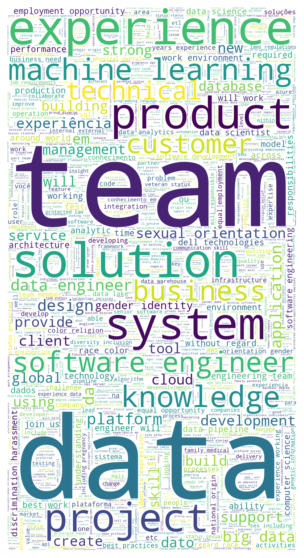

In [217]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('spanish'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [218]:
df.to_csv('EDA_data.csv')